# Problem Statement:

Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

Do ETL: Extract-Transform-Load some Amazon dataset and find for me Sales-trend -> month-wise, year-wise, yearly_month-wise

Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.

Keeping the problem statement in mind let us do the analysis

# Importing relevant liberaries

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates
from datetime import datetime

Now we get the dataset and display it

In [164]:
uncleaned_df=pd.read_csv(r"C:\Users\slowd\OneDrive\Desktop\Projects\unified_mentor\Amazon Sales data.csv")
uncleaned_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Cleaning the dataset

## Checking for null values

In [165]:
nullvals=uncleaned_df.isnull().sum()
nullvals

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

No null values are found in the dataset

Now we look at shape of dataset

In [166]:
uncleaned_df.shape

(100, 14)

## Dropping duplicates

In [167]:
df=uncleaned_df.drop_duplicates()
df.shape

(100, 14)

There are no duplicates in the dataset

## Getting proper dates

In [168]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['Month'] = df['Order Date'].dt.month
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Year'] = df['Order Date'].dt.year
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Shipping Time,Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,30,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,24,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,6,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,15,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,5,2013


## Changing a few columns of data to more readable and understandable format

In [169]:
month_mapping={
    1:"Jan",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"
}
country_name_mapping = {
    'Federated States of Micronesia': 'F.S Micronesia'
}

priority_mapping = {
    'H':'High','M':'Medium','C' : 'Critical', 'L':'Low'
}
df['Order Priority'] = df['Order Priority'].replace(priority_mapping)
df['Country'] = df['Country'].replace(country_name_mapping)
df['Month'] = df['Month'].replace(month_mapping)
df['Month']=df['Month'].astype('string')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Shipping Time,Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,May,30,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,Aug,24,2012
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,May,6,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,June,15,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,Feb,5,2013


## More insights

For example if some orders have same order IDs then we can perfrom an analysis based on products that are frequently brought together.

In [170]:
len(df['Order ID'].unique())

100

It is understood that there are 100 total rows in the dataset and there are 100 total order IDs hence each ID is unique.

In [171]:
df['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

Here it is understood that there are 12 types of items that are ordered in this dataset.

In [172]:
print(df['Year'].unique().min(),df['Year'].unique().max())


2010 2017


Here we understand that the orders are ranged from the years 2010 to 2017.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
 14  Month           100 non-null    string        
 15  Shippin

In [174]:
latest_order = df.loc[df['Order Date'].idxmax()]
latest_order['Month']

'May'

Here we can see that the latest order that was placed was in the month of may which indicates that the dataset has orders only till may of 2017.

## Dropping unnecessary columns.

In [175]:
df = df.drop(['Order ID', 'Order Date','Ship Date'], axis=1)

In [176]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Shipping Time,Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,9925,255.28,159.42,2533654.00,1582243.50,951410.50,May,30,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2804,205.70,117.11,576782.80,328376.44,248406.36,Aug,24,2012
2,Europe,Russia,Office Supplies,Offline,Low,1779,651.21,524.96,1158502.59,933903.84,224598.75,May,6,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,8102,9.33,6.92,75591.66,56065.84,19525.82,June,15,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,5062,651.21,524.96,3296425.02,2657347.52,639077.50,Feb,5,2013


The cleaning is done. 

# The Analysis.

## Various Monthly Analysis

### Months with most profit

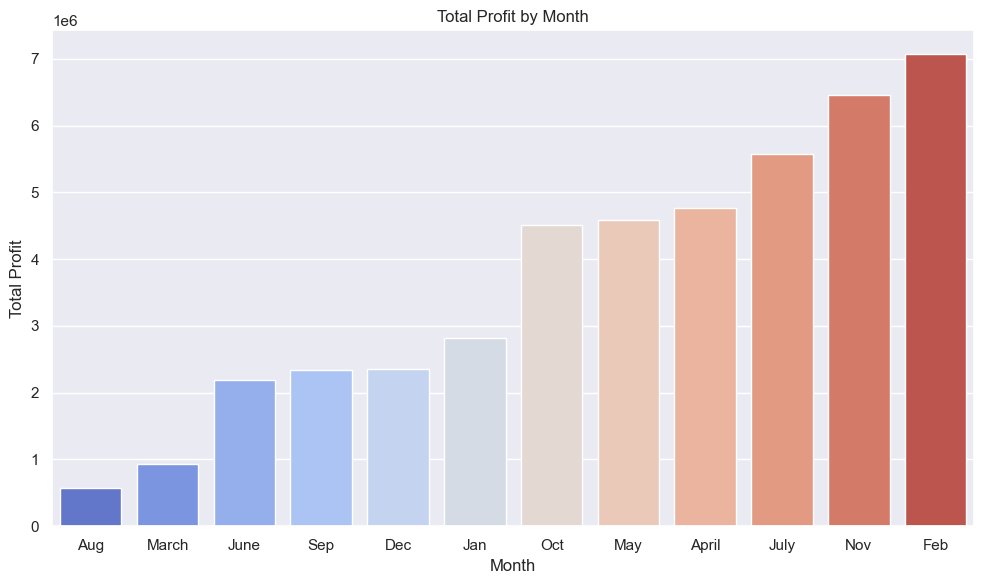

In [177]:
profit_by_month = df.groupby('Month')['Total Profit'].sum()
profit_by_month=profit_by_month.sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_month.index, y=profit_by_month.values, palette='coolwarm',legend=False)
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Total Profit by Month')
plt.tight_layout()
plt.show()

Here we understand that the months of Feburary, November, July and April have the highest profit every year.

### Highest Items sold each month

In [178]:
def items_monthly(df, month_number,no_items=12,items_only=False):
    filtered_df = df[df['Month'] == month_number]
    total_units_by_item = filtered_df.groupby('Item Type')['Units Sold'].sum().reset_index()
    total_units_by_item = total_units_by_item.sort_values(by='Units Sold', ascending=False)
    if items_only==True:
        return list(total_units_by_item['Item Type'][0:no_items])
    else:
        return total_units_by_item.head(no_items)

In [179]:
profit_by_month=profit_by_month.sort_values(ascending=False)
order=list(profit_by_month.index)
ordered_monthly_top={}
for i in order:
    ordered_monthly_top[i]=(items_monthly(df,i,3,items_only=True))

In [180]:
data = []
for month, items in ordered_monthly_top.items():
    for rank, item in enumerate(items, start=1):
        data.append({'Month': month, 'Item Type': item, 'Rank': rank})

df1 = pd.DataFrame(data)
df1 = df1.sort_values(by='Month')
table_df = df1.pivot(index='Month', columns='Rank', values='Item Type')
table_df = table_df.loc[list(ordered_monthly_top.keys())]
table_df.columns = [f'Top {rank}' for rank in table_df.columns]
table_df

,Top 1,Top 2,Top 3
Month,,,
Feb,Household,Personal Care,Cosmetics
Nov,Cosmetics,Fruits,Office Supplies
July,Personal Care,Cosmetics,Beverages
April,Office Supplies,Clothes,Cosmetics
May,Baby Food,Personal Care,Cereal
Oct,Beverages,Clothes,Office Supplies
Jan,Beverages,Household,Clothes
Dec,Cosmetics,Household,Personal Care
Sep,Fruits,Cosmetics,Clothes


Top items sold in each month of the year are presented. In February, it is seen that household, personal care, and cosmetic items are sold the most in every year during this month, likely due to Valentine's Day.

In November, it is cosmetics, fruits, and office supplies. This month is considered a festive season in some parts of Asia and a pre-festive season in others, explaining the high sales during this month.

By reading this, we can understand the need to increase the advertising of these products during certain times of the month.

It is also important to note that certain regions have specific times for festivals, so it is appropriate to consider that as well.

### Contribution of top 4 months based on region

In [181]:
def region_contribution_to_item_sales(month, item_types, df):
    filtered_df = df[(df['Month'] == month) & (df['Item Type'].isin(item_types))]
    total_units_sold = filtered_df['Units Sold'].sum()
    region_sales = filtered_df.groupby('Region')['Units Sold'].sum().reset_index()
    region_sales['Contribution (%)'] = (region_sales['Units Sold'] / total_units_sold) * 100
    region_sales = region_sales.sort_values(by='Contribution (%)', ascending=False)
    item_types_str = ', '.join(item_types)
    new_columns = pd.MultiIndex.from_tuples([
        ('Region', f'In Month of: {month}'), 
        ('Units Sold', f'Sum of Items: {item_types_str}'), 
        ('Contribution (%)', f' % of Items contribution')
    ])
    
    region_sales.columns = new_columns
    
    return region_sales

In [182]:
region_contribution_to_item_sales('Feb',ordered_monthly_top['Feb'],df)

,Region,Units Sold,Contribution (%)
,In Month of: Feb,"Sum of Items: Household, Personal Care, Cosmetics",% of Items contribution
1,Central America and the Caribbean,8974,25.105609
3,Middle East and North Africa,7234,20.237795
4,North America,6422,17.966149
5,Sub-Saharan Africa,5367,15.014687
0,Asia,4901,13.711009
2,Europe,2847,7.964750


In [183]:
region_contribution_to_item_sales('April',ordered_monthly_top['April'],df)

,Region,Units Sold,Contribution (%)
,In Month of: April,"Sum of Items: Office Supplies, Clothes, Cosmetics",% of Items contribution
2,Sub-Saharan Africa,14557,52.086017
0,Asia,11718,41.927866
1,Europe,1673,5.986117


In [184]:
region_contribution_to_item_sales('July',ordered_monthly_top['July'],df)

,Region,Units Sold,Contribution (%)
,In Month of: July,"Sum of Items: Personal Care, Cosmetics, Beverages",% of Items contribution
0,Australia and Oceania,19043,34.907978
4,Sub-Saharan Africa,14726,26.994427
2,Middle East and North Africa,9892,18.133157
3,North America,5767,10.571565
1,Europe,5124,9.392873


In [185]:
region_contribution_to_item_sales('Nov',ordered_monthly_top['Nov'],df)

,Region,Units Sold,Contribution (%)
,In Month of: Nov,"Sum of Items: Cosmetics, Fruits, Office Supplies",% of Items contribution
0,Asia,13219,32.738936
2,Middle East and North Africa,10273,25.442703
3,Sub-Saharan Africa,8975,22.228001
1,Europe,7910,19.590361


If we divide the year into four equal parts spanning three months each (i.e., Jan-March, April-June, July-Sept, Oct-Dec), we can understand a particular plan of action to be followed for a yearly cycle.

-> In the first part (Jan-March):

Amazon must focus its efforts and resources (manpower for deliveries, advertisement, marketing, etc.) on the Central America and the Caribbean, the Middle East and North Africa, and the North American regions to maximize profits, as sales are highest during February.

-> In the second part (April-June):

During the second part of the year, they must transition to the Sub-Saharan Africa and Asia regions as sales are the fourth highest in the year during the month of April.

-> In the third part (July-Sept):

In the third part of the year, Amazon must focus on the Australia and Oceania, Sub-Saharan Africa, and Middle East and North Africa regions as sales are highest during the month of July and can yield massive profits during this time.

-> In the fourth part (Oct-Dec):

Here, efforts must be focused on the Asia, Middle East and North Africa, and Sub-Saharan Africa regions as sales are the second highest in the year during November.

Also, it is important to note that the Sub-Saharan Africa region seems to always have high sales regardless of the time of the year for more than half the year.

## Sales channel analysis

### Comparison of shipping times

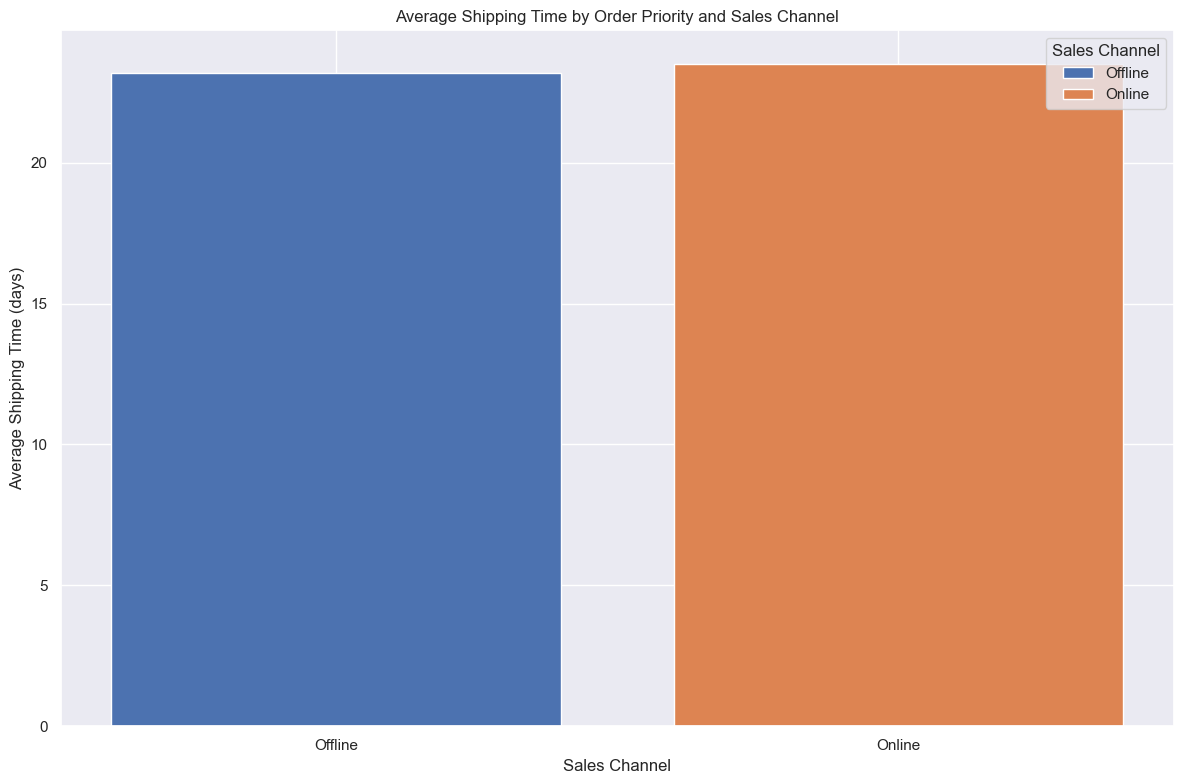

In [186]:
avg_shipping_time = df.groupby(['Sales Channel'])['Shipping Time'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

for sales_channel in avg_shipping_time['Sales Channel'].unique():
    channel_data = avg_shipping_time[avg_shipping_time['Sales Channel'] == sales_channel]
    ax.bar(f"{sales_channel}", channel_data['Shipping Time'], label=sales_channel)

plt.xlabel('Sales Channel')
plt.ylabel('Average Shipping Time (days)')
plt.title('Average Shipping Time by Order Priority and Sales Channel')

plt.legend(title='Sales Channel')
plt.tight_layout()
plt.show()

It is observed that the shipping time mostly same with Online being slightly higher.

### Online and Offline order on yearly basis

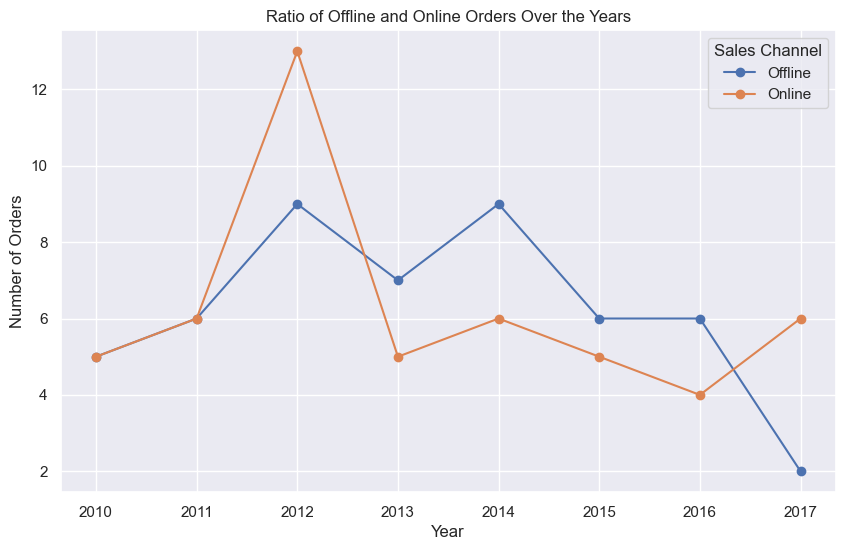

In [187]:
order_counts_by_year = df.groupby(['Year', 'Sales Channel']).size().reset_index(name='Order Count')
order_counts_pivot = order_counts_by_year.pivot(index='Year', columns='Sales Channel', values='Order Count').fillna(0)

order_counts_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ratio of Offline and Online Orders Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(order_counts_pivot.index)
plt.legend(title='Sales Channel')
plt.grid(True)
plt.show()

From this chart, it is observed that the offline sales channel was introduced in the year 2011. The sales channel experienced a brief rise but began losing popularity in 2015, remaining the same in 2016 and falling to a new low in 2017.

### Region wise ratio of sales channel orders

It is also interesting that during the period when it enjoyed popularity, offline sales were always higher than online. Only in the years 2012 and 2017 did the online sales channel perform better.

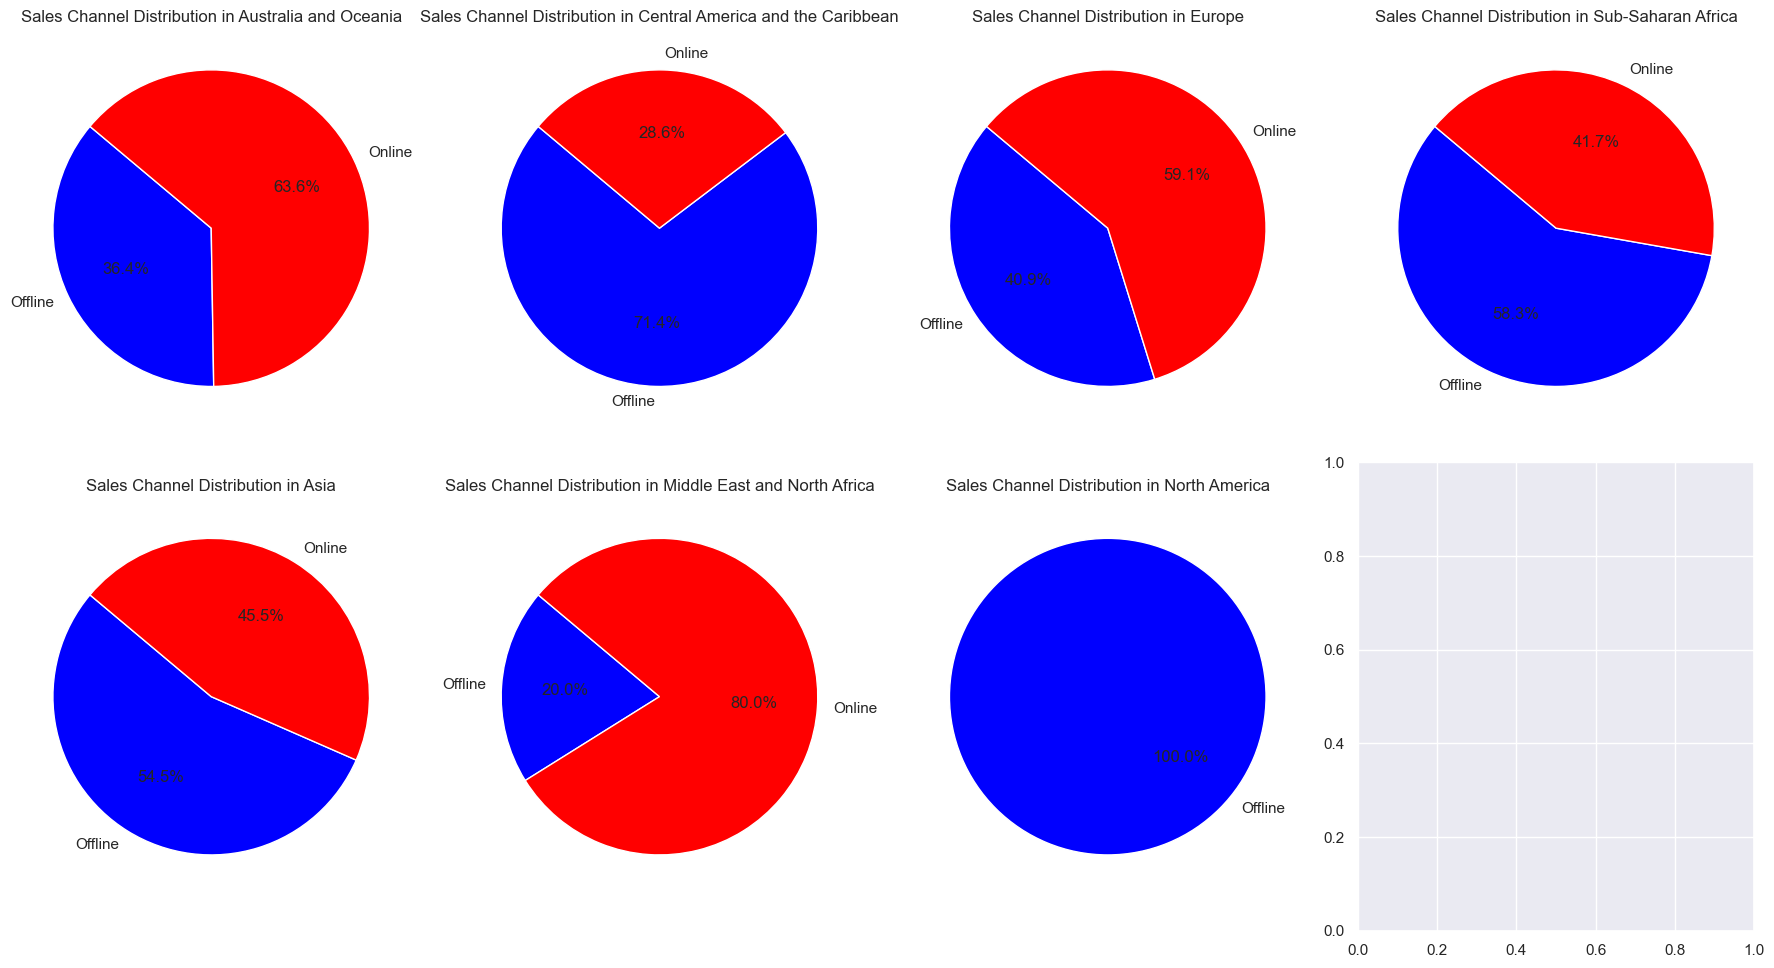

In [188]:
region_sales_channel_count = df.groupby(['Region', 'Sales Channel']).size().reset_index(name='Order Count')


region_total = region_sales_channel_count.groupby('Region')['Order Count'].sum().reset_index(name='Total Orders')
region_sales_channel_percentage = pd.merge(region_sales_channel_count, region_total, on='Region')
region_sales_channel_percentage['Percentage'] = (region_sales_channel_percentage['Order Count'] / region_sales_channel_percentage['Total Orders']) * 100

color_map = {
    'Online': 'red',
    'Offline': 'blue'
}


regions = df['Region'].unique()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

for i, region in enumerate(regions):
    ax = axes[i // 4, i % 4]
    region_data = region_sales_channel_percentage[region_sales_channel_percentage['Region'] == region]
    sizes = region_data['Percentage']
    labels = region_data['Sales Channel']
    region_colors = [color_map[label] for label in labels]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=region_colors)
    ax.set_title(f'Sales Channel Distribution in {region}')
    
plt.tight_layout()
plt.show()

Here we can see that the online sales channel holds a majority in three regions, is a slight minority in two regions, is a significant minority in one region, and is completely absent in one region. Therefore, it is evident that some regions are heavily dependent on offline sales.

Now, since there was a downturn in the offline sales channel, let us examine the data from 2017.

### Looking at data from 2017

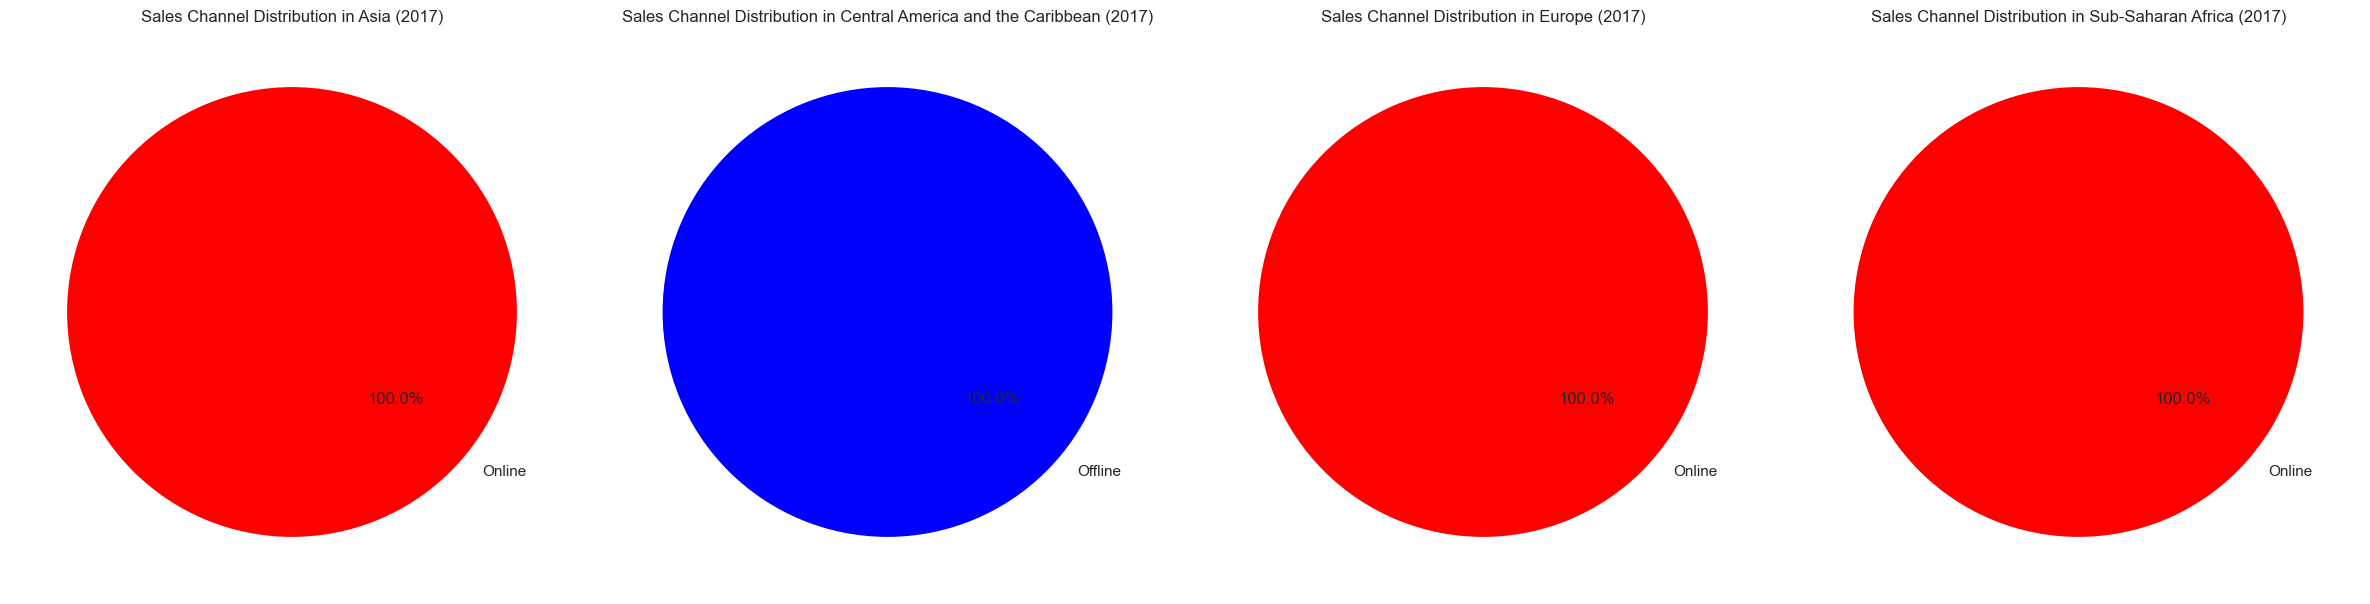

In [189]:
df_2017 = df[df['Year'] == 2017]
region_sales_channel_count = df_2017.groupby(['Region', 'Sales Channel']).size().reset_index(name='Order Count')
region_total = region_sales_channel_count.groupby('Region')['Order Count'].sum().reset_index(name='Total Orders')
region_sales_channel_percentage = pd.merge(region_sales_channel_count, region_total, on='Region')
region_sales_channel_percentage['Percentage'] = (region_sales_channel_percentage['Order Count'] / region_sales_channel_percentage['Total Orders']) * 100

color_map = {
    'Online': 'red',
    'Offline': 'blue'
}

regions = df_2017['Region'].unique()
num_regions = len(regions)
fig, axes = plt.subplots(nrows=1, ncols=num_regions, figsize=(6*num_regions, 6))

for i, region in enumerate(regions):
    ax = axes[i]
    region_data = region_sales_channel_percentage[region_sales_channel_percentage['Region'] == region]
    sizes = region_data['Percentage']
    labels = region_data['Sales Channel']
    region_colors = [color_map[label] for label in labels]
    
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=region_colors)
    ax.set_title(f'Sales Channel Distribution in {region} (2017)')
    
plt.tight_layout()
plt.show()

Here in 2017, it is seen that from the given dataset, only four regions have orders in 2017. Out of these, only one region had offline orders. This means all offline orders came from that region only in the year 2017.

We also know that the latest sales in the dataset occurred in the month of May. Hence, we can say that the sales data for 2017 is not complete.

## Sales over the years of various cosmetics.

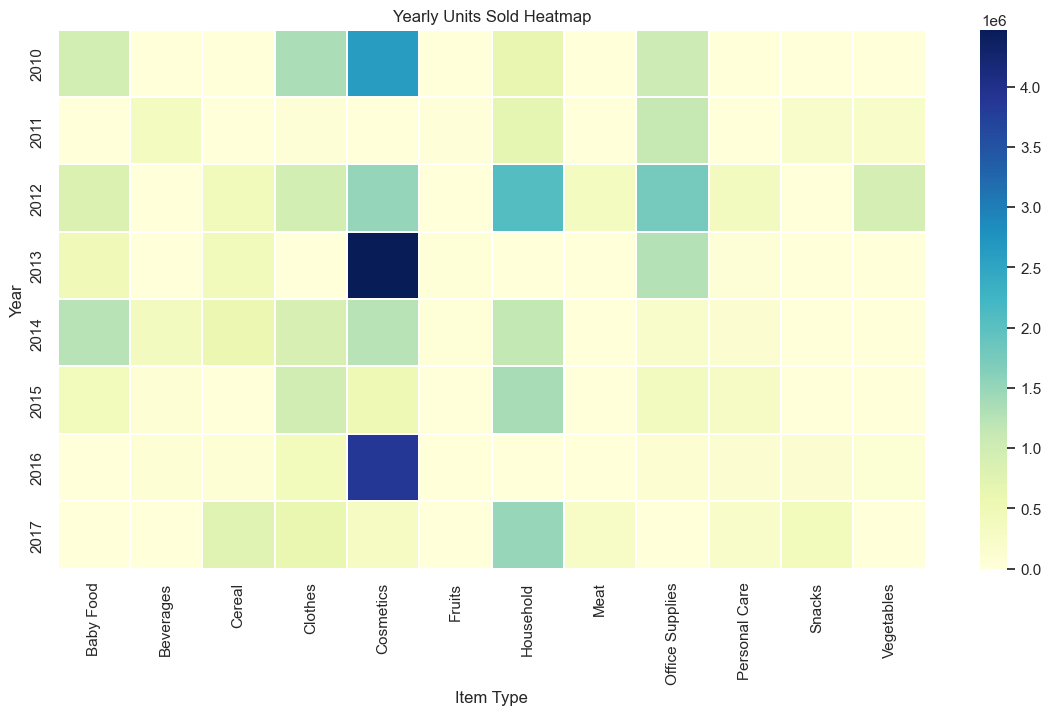

In [190]:
grouped_df = df.groupby(['Year', 'Item Type'])['Total Profit'].sum().reset_index()

pivot_table = grouped_df.pivot_table(index=['Year'], columns='Item Type', values='Total Profit', aggfunc='sum').fillna(0)
heatmap_data = grouped_df.pivot_table(index=['Year'], columns='Item Type', values='Total Profit', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.1, linecolor='white')
plt.title('Yearly Units Sold Heatmap')
plt.xlabel('Item Type')
plt.ylabel('Year')
plt.show()

Using this, the company can get a general idea of all the units sold over the years and the overall trend over the years. For example, profits in cosmetics seem to rise sharply every two years before declining slightly, whereas household items, despite selling lower than cosmetics in particular years, have remained consistent.

## Shipping dates based on order priority

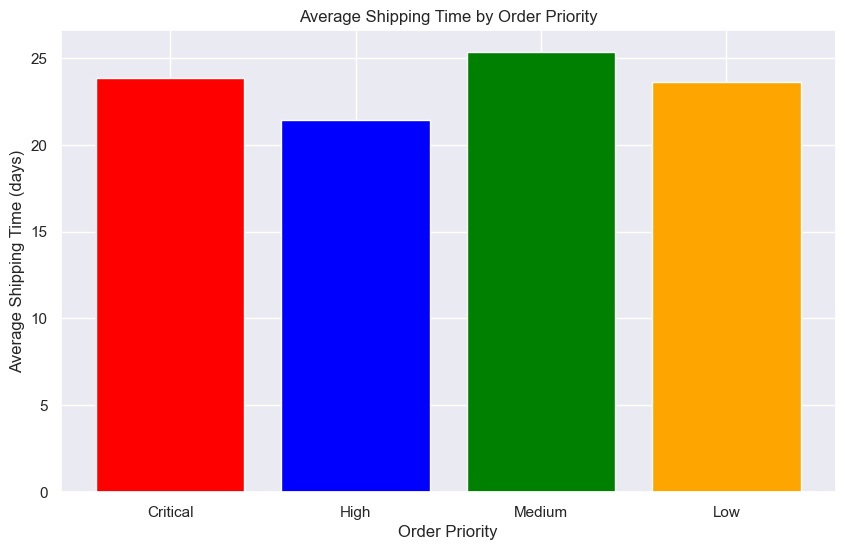

In [191]:
avg_shipping_time = df.groupby('Order Priority')['Shipping Time'].mean().reset_index()

order = ['Critical', 'High', 'Medium', 'Low']
avg_shipping_time = avg_shipping_time.set_index('Order Priority').loc[order].reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_shipping_time['Order Priority'], avg_shipping_time['Shipping Time'], color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Time (days)')
plt.title('Average Shipping Time by Order Priority')
plt.show()

Here we can see that, on average, the shipping times for high-priority orders are the shortest, whereas for critical orders, the shipping time is higher than the average shipping time for low-priority orders. This raises a major question about how the company handles various priority orders based on this data set.

## Total Profit vs Unit cost

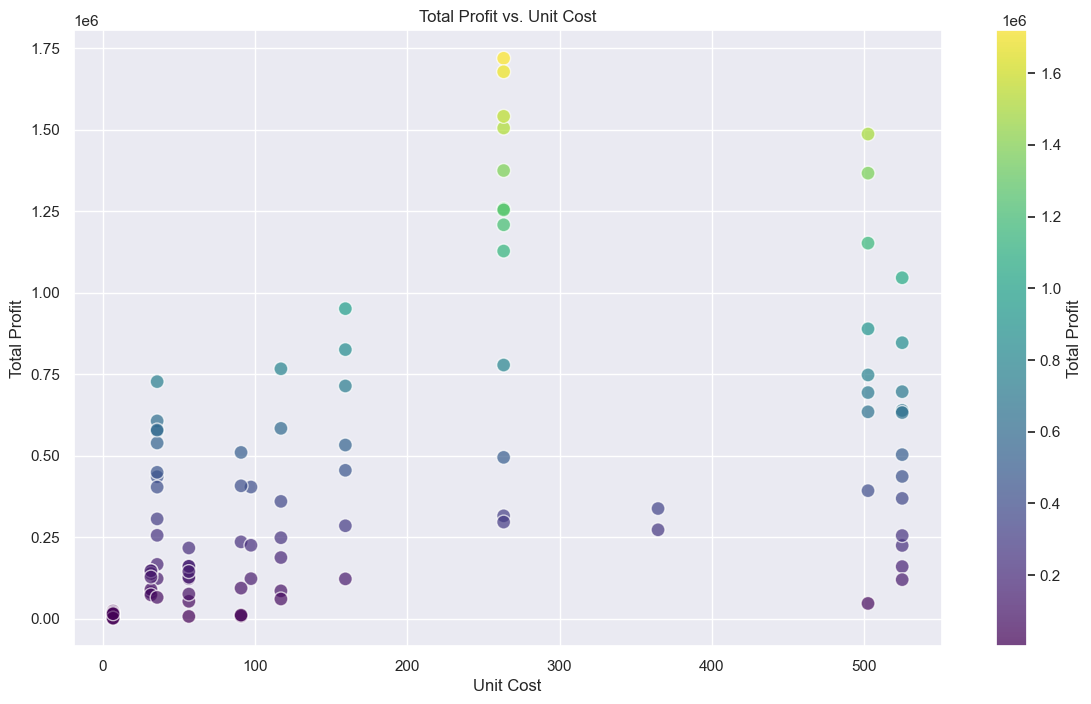

In [192]:
plt.figure(figsize=(14, 8))

sc = plt.scatter(df['Unit Cost'], df['Total Profit'], alpha=0.7, edgecolors='w', s=100, c=df['Total Profit'], cmap='viridis')

cbar = plt.colorbar(sc)
cbar.set_label('Total Profit')

plt.xlabel('Unit Cost')
plt.ylabel('Total Profit')
plt.title('Total Profit vs. Unit Cost')
plt.grid(True)
plt.show()

The above graph shows the total profit versus unit cost of all the items in the dataset.

It is observed that the majority of items are sold in the 100 to 200 range, but items around the price range of 200 to 300 seem to generate the most profit.

## Revenue based on region

### Regions with most revenue

In [193]:
revenue_by_country_region = df.groupby(['Region', 'Country'])['Total Revenue'].sum().reset_index()
def top_bottom_n_countries(df, n=3):
    top_n = df.groupby('Region').apply(lambda x: x.nlargest(n, 'Total Revenue')).reset_index(drop=True)
    bottom_n = df.groupby('Region').apply(lambda x: x.nsmallest(n, 'Total Revenue')).reset_index(drop=True)
    return top_n, bottom_n

top_3_countries, bottom_3_countries = top_bottom_n_countries(revenue_by_country_region, n=3)
revenue_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()

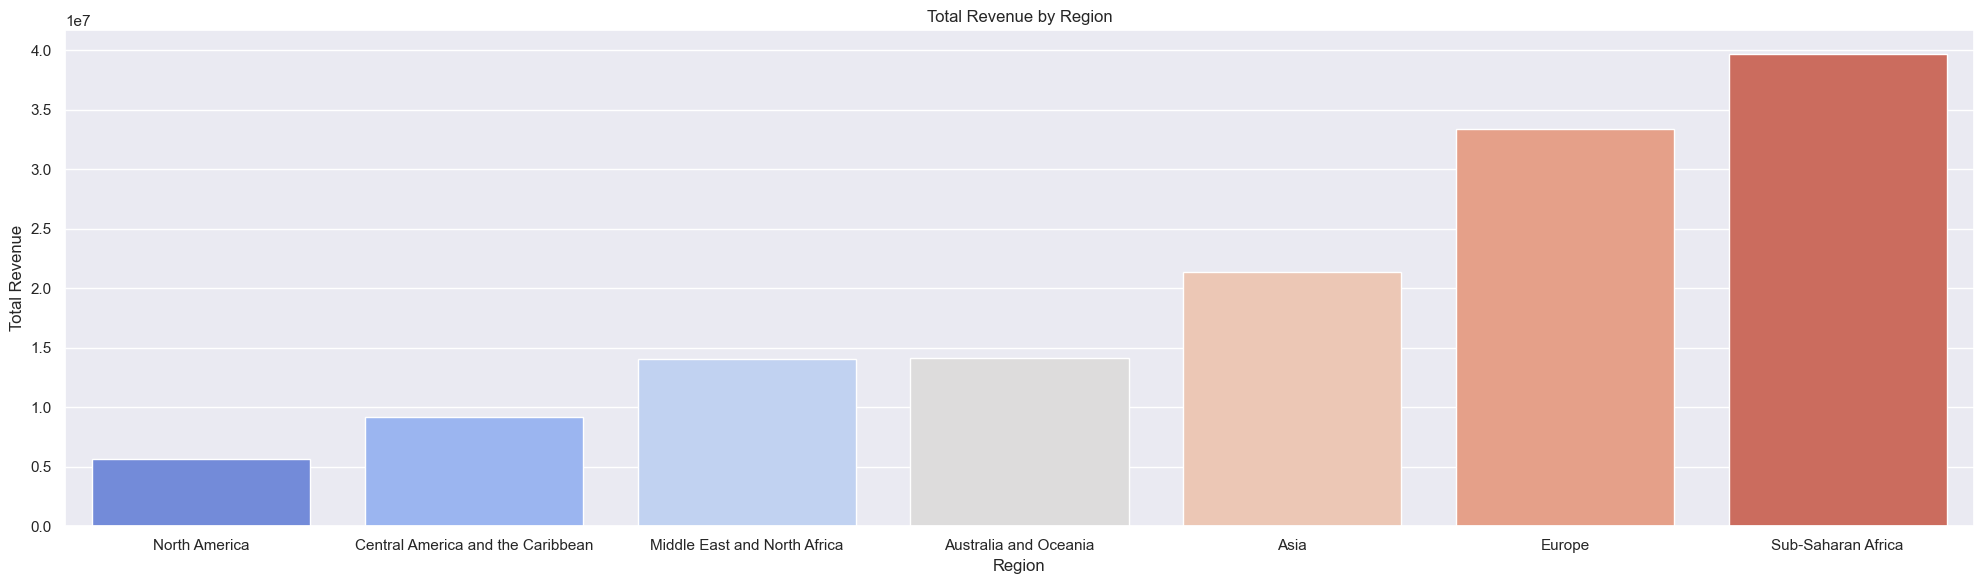

In [194]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Region', y='Total Revenue', data=revenue_by_region.sort_values("Total Revenue"), palette='coolwarm')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.tight_layout()
plt.show()

Here it is observed that Sub-Saharan Africa region has the most sales followed by Europe and then asia.

### Countries with most total revenue in each region

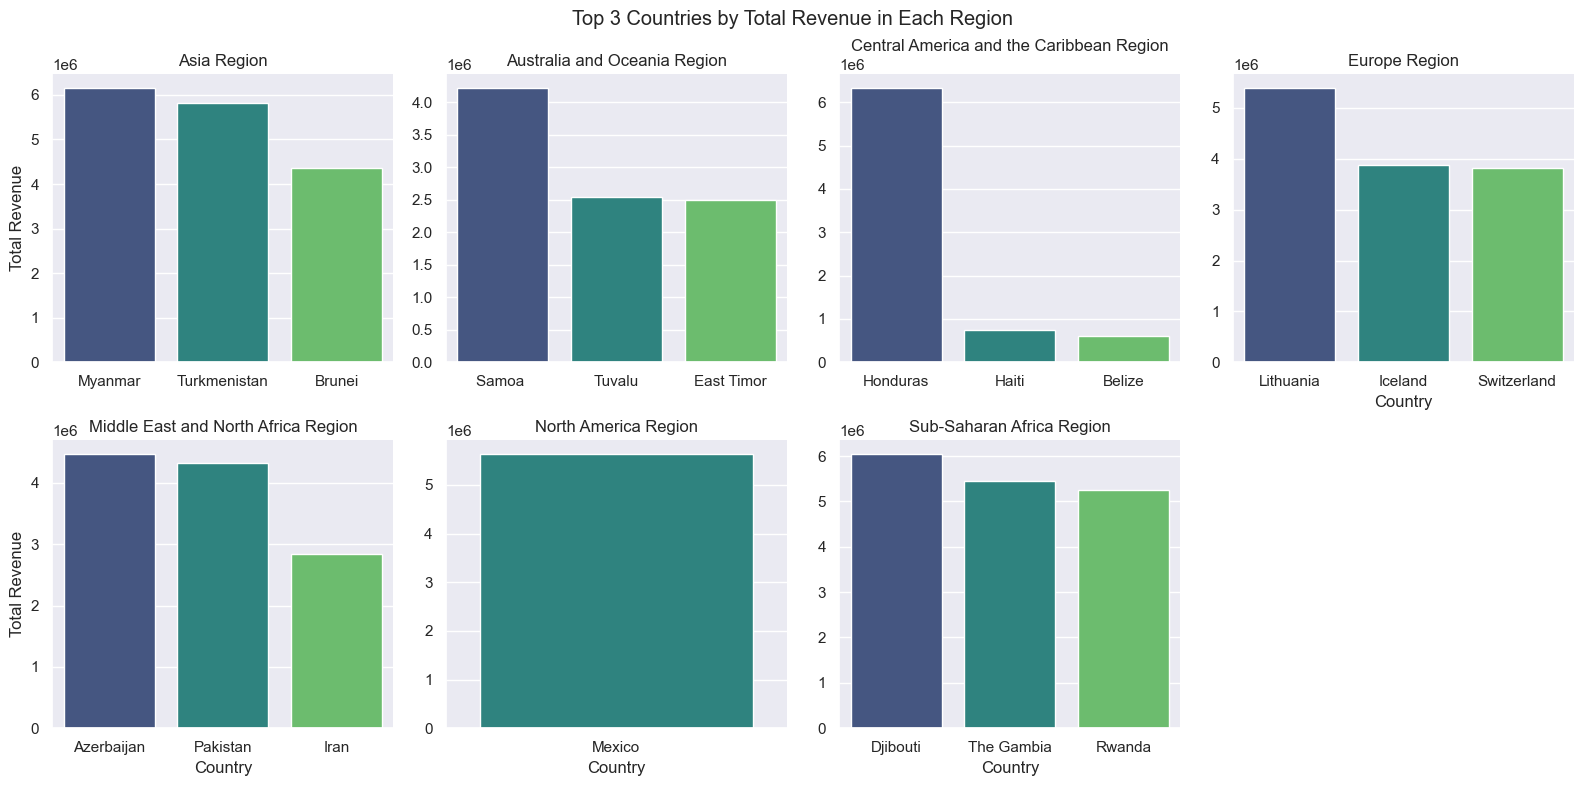

In [195]:
g = sns.FacetGrid(top_3_countries, col="Region", col_wrap=4, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x="Country", y="Total Revenue", palette="viridis")
g.set_axis_labels("Country", "Total Revenue")
g.set_titles(col_template="{col_name} Region")
g.set_xticklabels(rotation=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Top 3 Countries by Total Revenue in Each Region')
plt.show()

Ignore the North America Region as it has only one country that orders.

### Countries with least total revenue in each region

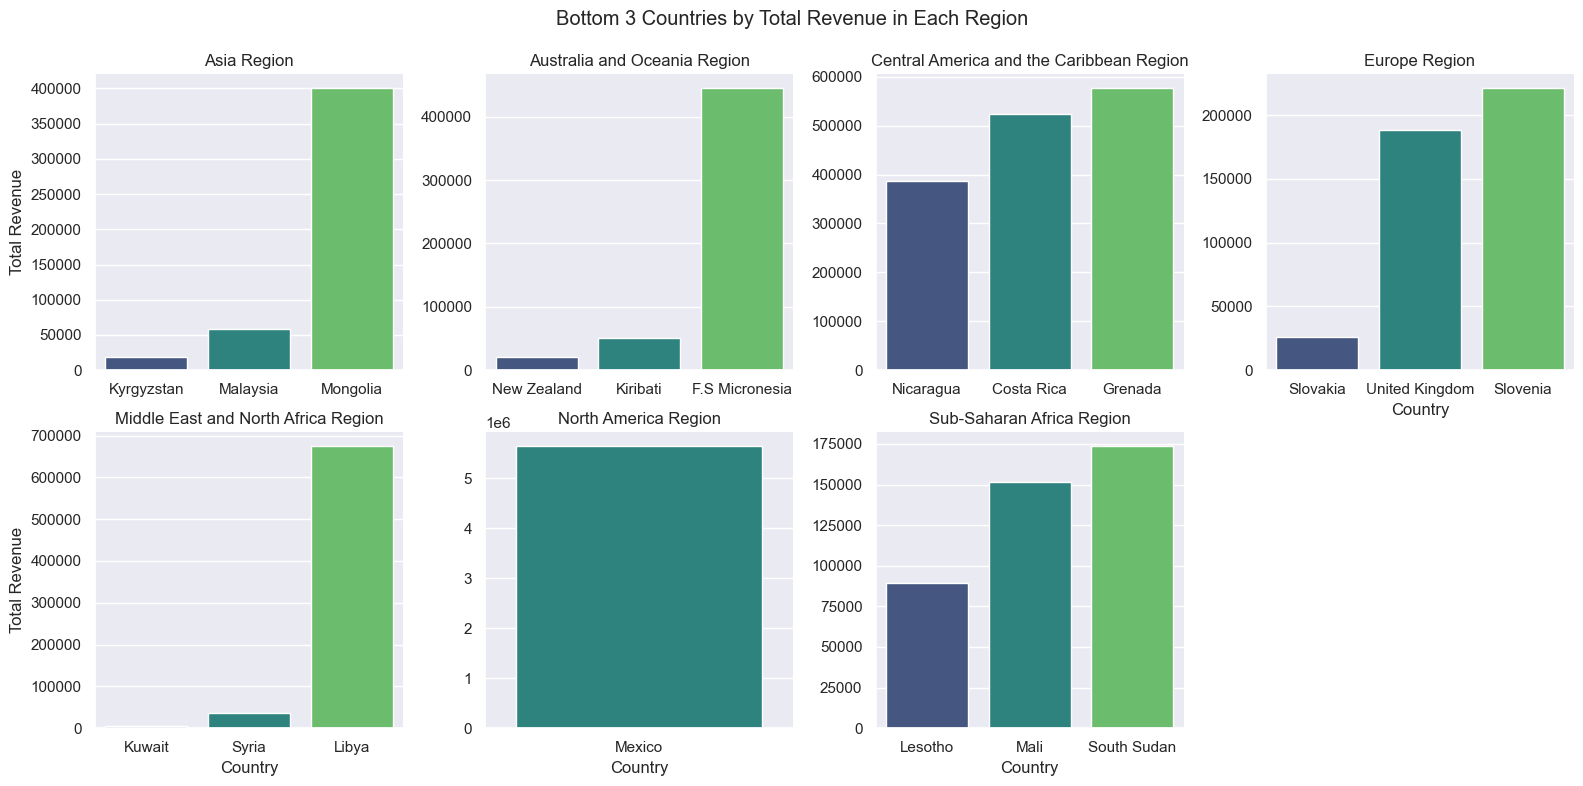

In [196]:
g = sns.FacetGrid(bottom_3_countries, col="Region", col_wrap=4, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x="Country", y="Total Revenue", palette="viridis")
g.set_axis_labels("Country", "Total Revenue")
g.set_titles(col_template="{col_name} Region")
g.set_xticklabels(rotation=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Bottom 3 Countries by Total Revenue in Each Region')
plt.show()

From the top countries and bottom countries by region graph, the company can now understand which countries in particular regions need to be focused on for better sales.

# Conclusion:
 The data is analyzed and understood in a comprenhensive manner with various insights provided such as an understanding of yearly pattern of increasing and decreasing sales in various months, understanding of how offline and online sales channel have grown/declined over the years and which regions still use it, how various priority of orders are handled, understanding sales patterns of certain products over the years and finally an understanding of total revenue based on region and countries in it